In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig
import seaborn
import networkx as nx
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # FontProperties
import warnings
warnings.filterwarnings("ignore")

In [2]:
path1 = r'E:\netData\MAG-nobel\Nobel papers CD.zip'
path2 = r'E:\netData\MAG-nobel\2 Nobel papers counterparts\Nobel counterparts CD.zip'

In [22]:
fNobel = pd.read_csv(path1)
fControl = pd.read_csv(path2)
fNobel.fillna(0 , inplace=True)
fControl.fillna(0 , inplace=True)

In [23]:
fControl0 = fControl[['Field','cit','CD', 'DIsharp', 'DIeasy', 'ni']]
fControl0['If Prize'] = 0
fControl0.columns = ['Field','Citation','CD', 'DI*', 'sDI', 'DC','If Prize']

In [24]:
fNobel0 = fNobel[['Field','cit','CD', 'DIsharp', 'DIeasy', 'ni']]
fNobel0['If Prize'] = 1
fNobel0.columns = ['Field','Citation','CD', 'DI*', 'sDI', 'DC','If Prize']

In [36]:
fNobel1 = fNobel0[fNobel0['Field']=='Physics']
fNobel2 = fNobel0[fNobel0['Field']=='Chemistry']
fNobel3 = fNobel0[fNobel0['Field']=='Medicine']

In [37]:
fControl1 = fControl0[fControl0['Field']=='Physics']
fControl2 = fControl0[fControl0['Field']=='Chemistry']
fControl3 = fControl0[fControl0['Field']=='Medicine']

In [38]:
ff1 = pd.concat([fNobel1 , fControl1])
ff2 = pd.concat([fNobel2 , fControl2])
ff3 = pd.concat([fNobel3 , fControl3])

# IR

In [81]:
def get_IR(threshold , v , f1):
    k = int(np.floor(len(f1)*threshold))
    totallau = len(f1[f1['If Prize']==1])
    f2 = f1.sort_values([v],ascending= False)
    f21 = f2.head(k)
    d = len(f21[f21['If Prize']==1])/totallau
    return d

In [82]:
flst = [ff1, ff2, ff3]

In [114]:
thresholds = [0.10,0.50]

In [115]:
vlst = ['Citation','CD', 'DI*', 'sDI', 'DC']

In [121]:
plt.rcParams['font.sans-serif'] = ['Arial'] 

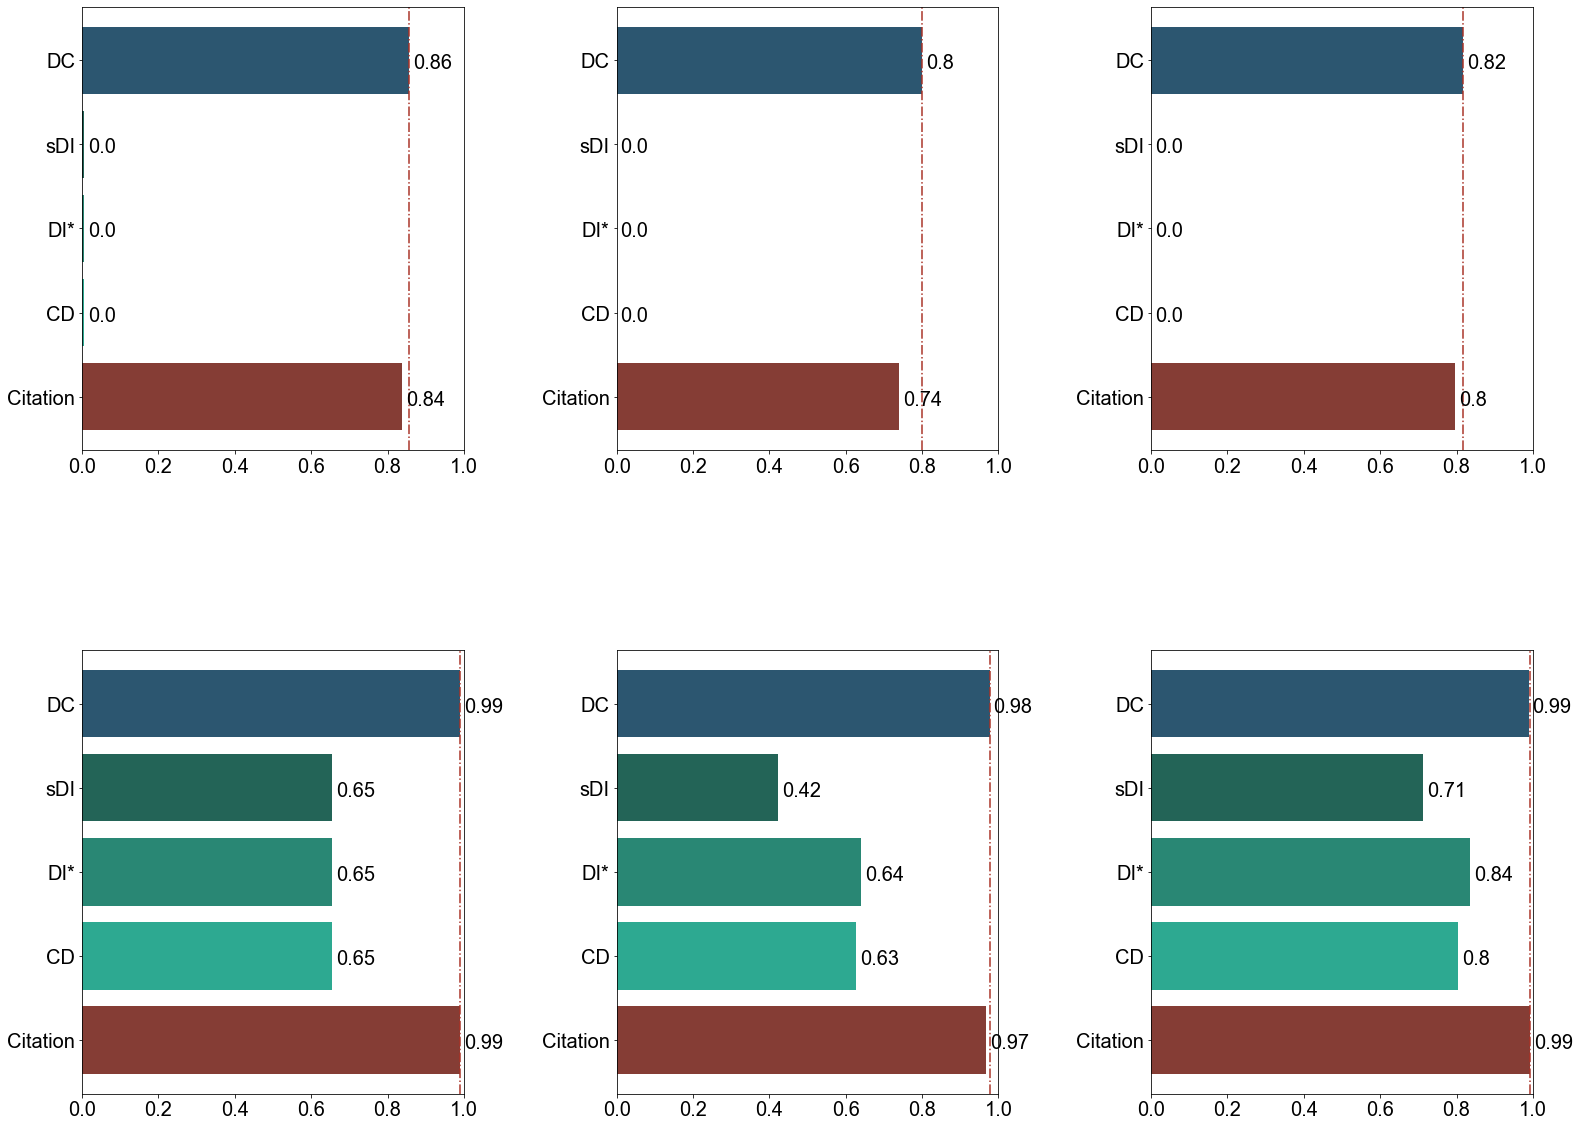

In [124]:
plt.subplots(2,3,figsize=(26,20))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=0.45)

for i in range(len(flst)):
    f = flst[i]
    for j in range(2):
        threshold = thresholds[j]
        dlst = [get_IR(threshold , v , f) for v in vlst]
        ax = plt.subplot(2,3,i+1+j*3)
        c = ['#78281F', '#16A085', '#117A65', '#0B5345', "#154360"]
        y_pos = [1,2,3,4,5,]      
        plt.axvline(x=max(dlst),ls = '-.', c = '#A93226')
        
        plt.barh(y_pos,dlst,align='center', color= c,alpha=0.9,capsize=10)
        plt.yticks(y_pos,['Citation','CD', 'DI*', 'sDI', 'DC'],fontsize = 20)
        plt.xlim(0,1)
        plt.xticks(fontsize=20)
        for k in range(len(dlst)):
            plt.text(dlst[k]+0.01, y_pos[k]-0.1, str(round(dlst[k],2)), color='black', fontsize=20)
plt.savefig(r"F:\A J YANG PAPER\MAG analysis\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig 5 6 B3\1.pdf",bbox_inches = 'tight')

In [103]:
#c = plt.rcParams['axes.prop_cycle'].by_key()['color']
thresholdlst = [0.01*i for i in range(1,100)]
c = ['#78281F', '#16A085', '#117A65', '#0B5345', "#154360"]
markers = ['*','v','+','X','o']
titles = ['Physics' ,'Chemistry' ,'Medicine']

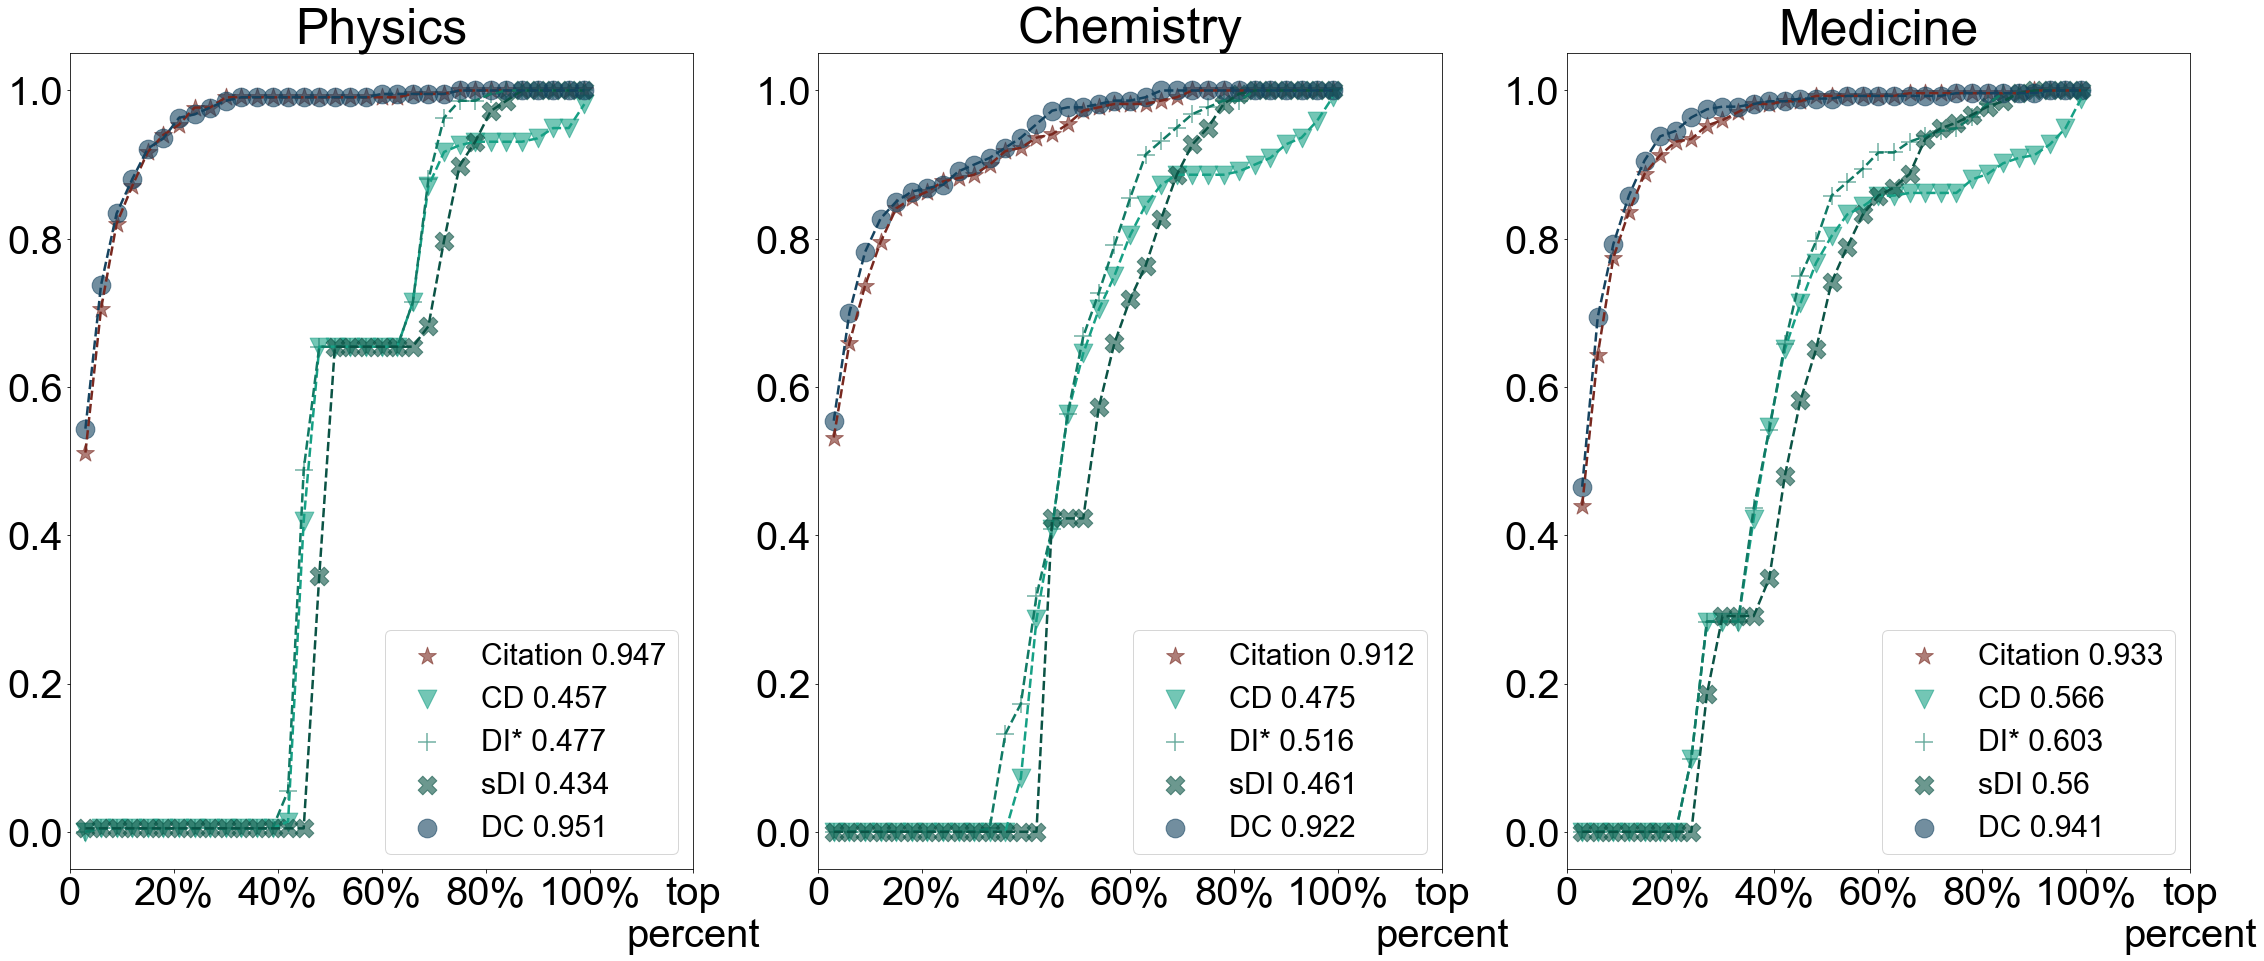

In [105]:
plt.subplots(1,3,figsize=(38,15))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2 )

for j in range(len(flst)):
    ff = flst[j]
    ax = plt.subplot(1,3,j+1)
    for i in range(len(vlst)):
        v = vlst[i]
        d = np.array([get_IR(threshold , v , ff) for threshold in thresholdlst])
        plt.scatter(thresholdlst[2::3],d[2::3],s=350,marker=markers[i],c=c[i],edgecolors=c[i],alpha=0.6,label=v +" "+ str(np.round(np.mean(d),3)))
        plt.plot(thresholdlst[2::3],d[2::3],linestyle = '--', linewidth=2.5,alpha=1,color=c[i])
#     ax.set_yscale("log")
    plt.xlim(0,1.2)
    plt.xticks([0,0.2,0.4,0.6,0.8,1,1.2],[0,'20%','40%','60%','80%','100%','top\npercent'],fontsize=40)
    plt.yticks(fontsize=40)
    plt.legend(fontsize =30)
    plt.title(titles[j],fontsize =50)
plt.savefig(r"F:\A J YANG PAPER\MAG analysis\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig 5 6 B3\2.pdf",bbox_inches = 'tight')

# AR

In [118]:
def get_AR( v , f1):
    f2 = f1.sort_values([v],ascending= False)
    f2.index = range(len(f2))
    lst = f2[f2['If Prize']==1].index
    d = sum(lst)/len(lst)
    return d

def get_AR2( v , f1):
    f2 = f1.sort_values([v],ascending= False)
    f2.index = range(len(f2))
    lst = f2[f2['If Prize']==1].index
    d = sum(lst)/(lst[-1] - lst[0])/len(lst)
    return d

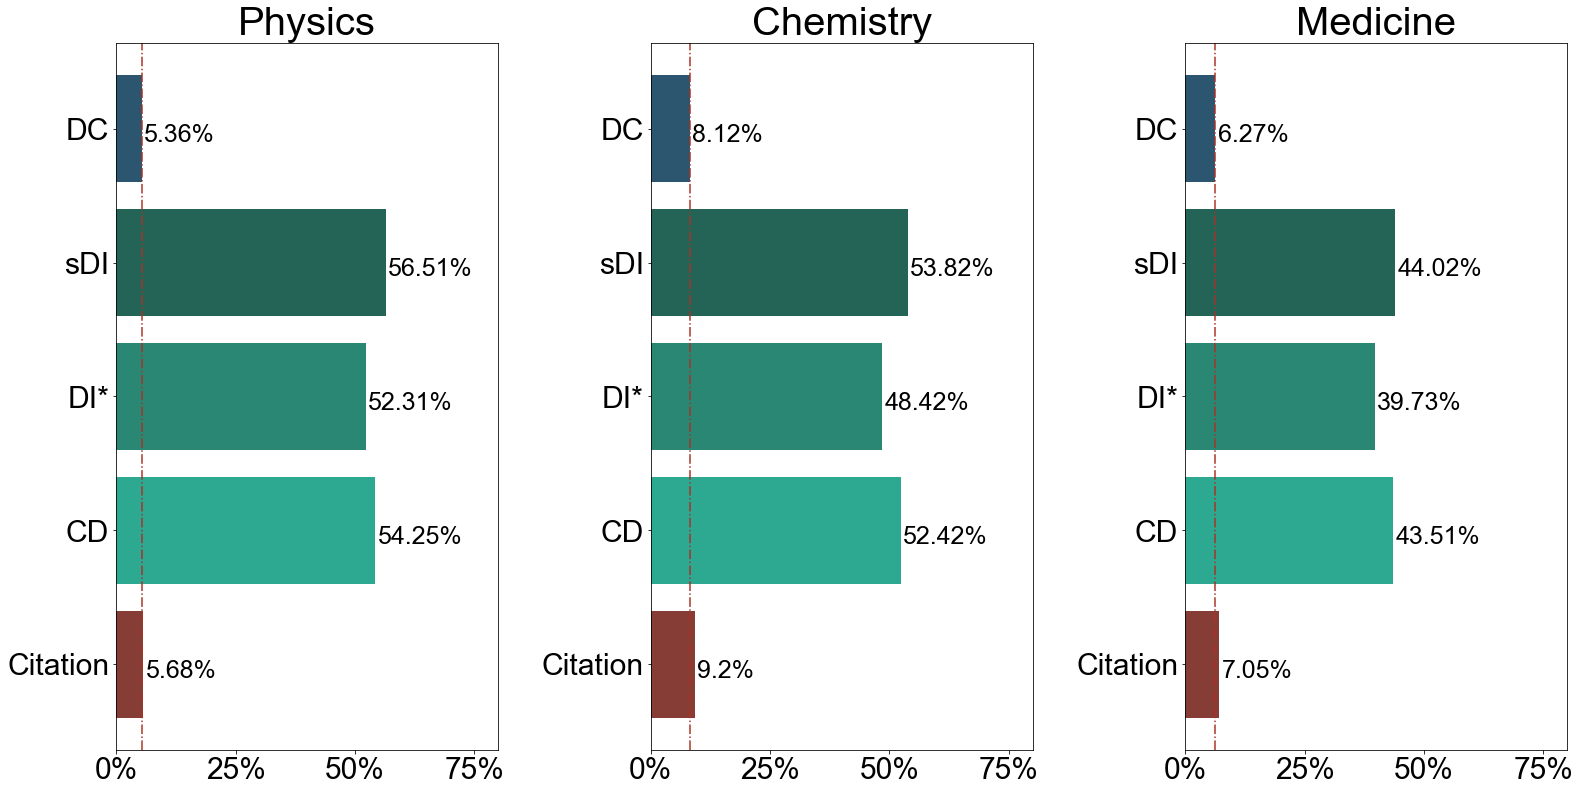

In [120]:
plt.subplots(1, 3, figsize=(26, 13))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.15)

for i in range(len(flst)):
    f = flst[i]
    dlst = [get_AR(v, f) for v in vlst]
    dlst_percent = [100 * x / len(f) for x in dlst]  # convert to percentage and normalize to 100%
    xticks_percent = [int(round(x)) for x in np.linspace(0, 100, 5)]  # calculate x-axis ticks as percentage values
    ax = plt.subplot(1, 3, i + 1)
    
    c = ['#78281F', '#16A085', '#117A65', '#0B5345', "#154360"]
    y_pos = [1, 2, 3, 4, 5,]
    plt.axvline(x=min(dlst_percent), ls='-.', c='#A93226')
    plt.barh(y_pos, dlst_percent, align='center', color=c, alpha=0.9, capsize=10)
    
    for x, v in enumerate(dlst_percent):
        plt.text(v + 0.5, x + 0.9, str(round(v, 2)) + "%", color='black', fontsize=25)
    
    plt.yticks(y_pos, ['Citation','CD', 'DI*', 'sDI', 'DC'],
               fontsize=30)
    plt.xticks(xticks_percent, [str(x) + "%" for x in xticks_percent], fontsize=30)  # set x-axis ticks as percentage values
    plt.xlim(0, 80)
    plt.title(titles[i],fontsize =40)
plt.savefig(r"F:\A J YANG PAPER\MAG analysis\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig 5 6 B3\3.pdf",bbox_inches = 'tight')

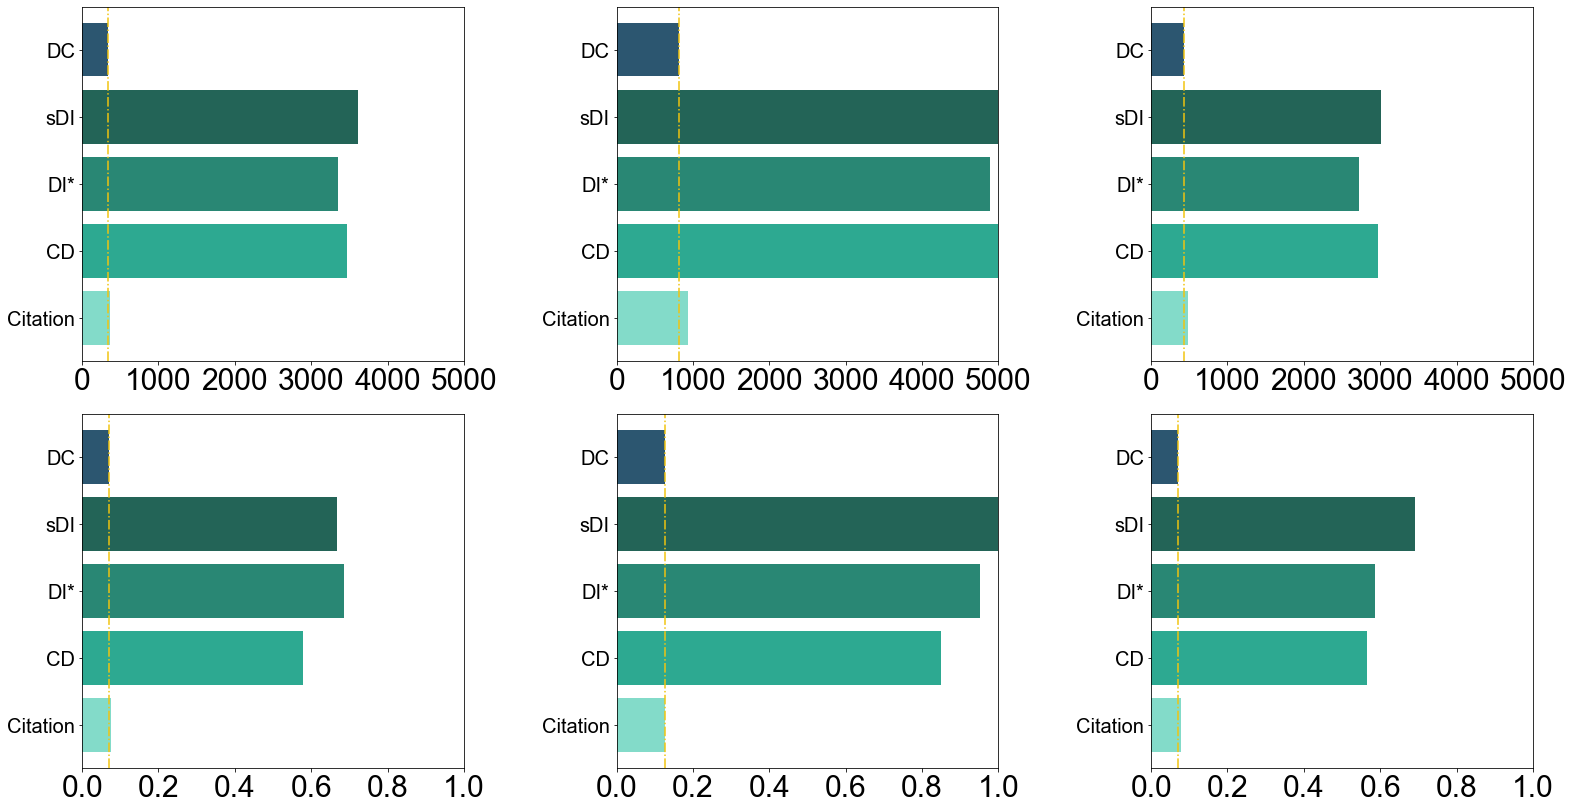

In [62]:
plt.subplots(2,3,figsize=(26,14))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=0.15)

for i in range(len(flst)):
    f = flst[i]
    for j in range(2):
        if j == 0:
            dlst = [get_AR(v , f) for v in vlst]
            plt.xlim(0,1)
        else:
            dlst = [get_AR2(v , f) for v in vlst]
            plt.xlim(0,5000)
        ax = plt.subplot(2,3,i+1+j*3)
        #c = ['#F1948A','#E74C3C','#B03A2E','#78281F',"#154360","#1F618D","#2980B9","#3498DB","#85C1E9"]
        y_pos = [1,2,3,4,5,]
        plt.axvline(x=min(dlst),ls = '-.', c = '#F1C40F')
        plt.barh(y_pos,dlst,align='center', color= c,alpha=0.9,capsize=10)
        plt.yticks(y_pos,['Citation','CD', 'DI*', 'sDI', 'DC'],fontsize = 20)
        plt.xticks(fontsize=30)
plt.savefig(r"F:\A J YANG PAPER\MAG analysis\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig 5\4.pdf",bbox_inches = 'tight')